In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score


In [ ]:
drive.mount('/content/gdrive')
data = pd.read_csv('gdrive/My Drive/buntyshahauto-insurance-claims-data.csv')

Mounted at /content/gdrive


In [ ]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
column_delete = ['_c39', 'policy_number', 'policy_bind_date', 'policy_csl', 'incident_date', 'incident_location',"insured_zip", "insured_hobbies", 'incident_city', 'auto_make', 'auto_model', 'auto_year']
data = data.drop(columns=column_delete)

In [ ]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [ ]:
if data.duplicated().any():
    print(data.duplicated().sum(),"has duplicate data.")
else:
    print("no duplicate.")

no duplicate.


In [ ]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [ ]:
X = data.drop(columns=['fraud_reported'])
y = data['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
y_train_resampled.value_counts()

N    608
Y    608
Name: fraud_reported, dtype: int64

In [ ]:
numerical= X.select_dtypes(include='number').columns
categorical= X.select_dtypes(include='object').columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical)
    ])
X_train_encoded = preprocessor.fit_transform(X_train_resampled)
X_test_encoded = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_encoded)
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(X_train_encoded)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_encoded)
kmeans_score = silhouette_score(X_train_encoded, kmeans_labels)
agg_score = silhouette_score(X_train_encoded, agg_labels)
dbscan_score = silhouette_score(X_train_encoded, dbscan_labels)
print(f"K-Means: {kmeans_score}")
print(f"Agglomerative Hierarchical: {agg_score}")
print(f"DBSCAN: {dbscan_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means: 0.15569078084268953
Agglomerative Hierarchical: 0.16083819317208767
DBSCAN: -0.04539766261829971


In [ ]:
y_true_binary = np.where(y_train_resampled == 'Y', 1, 0)
confusion_matrix_kmeans = confusion_matrix(y_true_binary, kmeans_labels)
print("\nK-Means:",confusion_matrix_kmeans)
confusion_matrix_agg = confusion_matrix(y_true_binary, agg_labels)
print("\nAgglomerative Hierarchical:",confusion_matrix_agg)
confusion_matrix_dbscan = confusion_matrix(y_true_binary, dbscan_labels)
print("\nDBSCAN:",confusion_matrix_dbscan)


K-Means: [[142 466]
 [ 51 557]]

Agglomerative Hierarchical: [[478 130]
 [563  45]]

DBSCAN: [[  0   0   0 ...   0   0   0]
 [608   0   0 ...   0   0   0]
 [389   5   6 ...   6   6   9]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
print("K-Means:")
print(classification_report(y_true_binary, kmeans_labels))
print("Agglomerative Hierarchical:")
print(classification_report(y_true_binary, agg_labels))
print(" DBSCAN:")
print(classification_report(y_true_binary, dbscan_labels))

K-Means:
              precision    recall  f1-score   support

           0       0.74      0.23      0.35       608
           1       0.54      0.92      0.68       608

    accuracy                           0.57      1216
   macro avg       0.64      0.57      0.52      1216
weighted avg       0.64      0.57      0.52      1216

Agglomerative Hierarchical:
              precision    recall  f1-score   support

           0       0.46      0.79      0.58       608
           1       0.26      0.07      0.11       608

    accuracy                           0.43      1216
   macro avg       0.36      0.43      0.35      1216
weighted avg       0.36      0.43      0.35      1216

 DBSCAN:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       608
           1       1.00      0.01      0.02       608
           2       0.00      0.00      0.00         0
           3       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def sensitivity_analysis(X, model, param_name, param_values):
    results = []
    for param_value in param_values:
        if param_name == 'n_clusters':
            current_model = model(n_clusters=param_value, random_state=42)
        elif param_name == 'linkage':
            current_model = model(n_clusters=2, linkage=param_value)
        elif param_name == 'eps':
            current_model = model(eps=param_value, min_samples=5)
        else:
            raise ValueError("Unsupported parameter name")
        labels = current_model.fit_predict(X)
        silhouette = silhouette_score(X, labels)
        results.append((param_value, silhouette))
    return results
kmeans_clusters_values = range(2, 10)
kmeans_sensitivity_results = sensitivity_analysis(X_train_encoded, KMeans, 'n_clusters', kmeans_clusters_values)
agg_linkage_values = ['ward', 'complete', 'average', 'single']
agg_sensitivity_results = sensitivity_analysis(X_train_encoded, AgglomerativeClustering, 'linkage', agg_linkage_values)
dbscan_eps_values = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5]
dbscan_sensitivity_results = sensitivity_analysis(X_train_encoded, DBSCAN, 'eps', dbscan_eps_values)
print("Sensitivity Analysis for K-Means:")
for result in kmeans_sensitivity_results:
    print(f"Number of Clusters: {result[0]}, Silhouette Score: {result[1]:.4f}")
print("\nSensitivity Analysis for Agglomerative Hierarchical:")
for result in agg_sensitivity_results:
    print(f"Linkage Type: {result[0]}, Silhouette Score: {result[1]:.4f}")
print("\nSensitivity Analysis for DBSCAN:")
for result in dbscan_sensitivity_results:
    print(f"Epsilon: {result[0]}, Silhouette Score: {result[1]:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Sensitivity Analysis for K-Means:
Number of Clusters: 2, Silhouette Score: 0.1557
Number of Clusters: 3, Silhouette Score: 0.0949
Number of Clusters: 4, Silhouette Score: 0.0863
Number of Clusters: 5, Silhouette Score: 0.0769
Number of Clusters: 6, Silhouette Score: 0.0786
Number of Clusters: 7, Silhouette Score: 0.0819
Number of Clusters: 8, Silhouette Score: 0.0753
Number of Clusters: 9, Silhouette Score: 0.0766

Sensitivity Analysis for Agglomerative Hierarchical:
Linkage Type: ward, Silhouette Score: 0.1608
Linkage Type: complete, Silhouette Score: 0.1548
Linkage Type: average, Silhouette Score: 0.1596
Linkage Type: single, Silhouette Score: 0.1651

Sensitivity Analysis for DBSCAN:
Epsilon: 0.1, Silhouette Score: -0.0454
Epsilon: 0.5, Silhouette Score: -0.0454
Epsilon: 1.0, Silhouette Score: -0.0454
Epsilon: 1.5, Silhouette Score: -0.0454
Epsilon: 2.0, Silhouette Score: -0.0454
Epsilon: 2.5, Silhouette Score: -0.0454


In [ ]:
true_labels = y_train_resampled
silhouette_kmeans = silhouette_score(X_train_encoded, kmeans_labels)
silhouette_agg = silhouette_score(X_train_encoded, agg_labels)
silhouette_dbscan = silhouette_score(X_train_encoded, dbscan_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(X_train_encoded, kmeans_labels)
calinski_harabasz_agg = calinski_harabasz_score(X_train_encoded, agg_labels)
calinski_harabasz_dbscan = calinski_harabasz_score(X_train_encoded, dbscan_labels)
davies_bouldin_kmeans = davies_bouldin_score(X_train_encoded, kmeans_labels)
davies_bouldin_agg = davies_bouldin_score(X_train_encoded, agg_labels)
davies_bouldin_dbscan = davies_bouldin_score(X_train_encoded, dbscan_labels)
adjusted_rand_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
adjusted_rand_agg = adjusted_rand_score(true_labels, agg_labels)
adjusted_rand_dbscan = adjusted_rand_score(true_labels, dbscan_labels)
comparison_table = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Index', 'Davies-Bouldin Index', 'Adjusted Rand Index'],
    'K-Means': [silhouette_kmeans, calinski_harabasz_kmeans, davies_bouldin_kmeans, adjusted_rand_kmeans],
    'Agglomerative': [silhouette_agg, calinski_harabasz_agg, davies_bouldin_agg, adjusted_rand_agg],
    'DBSCAN': [silhouette_dbscan, calinski_harabasz_dbscan, davies_bouldin_dbscan, adjusted_rand_dbscan]
})
print("Comparison Table:")
print(comparison_table)

Comparison Table:
                    Metric     K-Means  Agglomerative    DBSCAN
0         Silhouette Score    0.155691       0.160838 -0.045398
1  Calinski-Harabasz Index  156.159440     154.312593  6.669355
2     Davies-Bouldin Index    1.951222       1.867259  1.043942
3      Adjusted Rand Index    0.021971       0.019147  0.066177


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


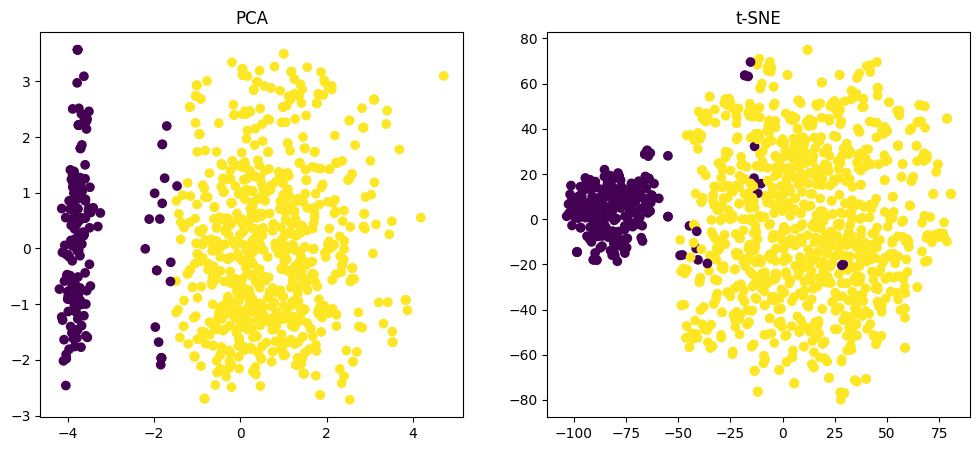

PCA: 0.519085992622796
SNE: 0.3719598352909088


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
n_clusters = 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_encoded)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_encoded)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_train_encoded))
axes[0].set_title('PCA')
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_train_encoded))
axes[1].set_title('t-SNE')
plt.show()
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels_pca = kmeans.fit_predict(X_pca)
kmeans_labels_tsne = kmeans.fit_predict(X_tsne)
silhouette_score_pca = silhouette_score(X_pca, kmeans_labels_pca)
silhouette_score_tsne = silhouette_score(X_tsne, kmeans_labels_tsne)
print(f"PCA: {silhouette_score_pca}")
print(f"SNE: {silhouette_score_tsne}")

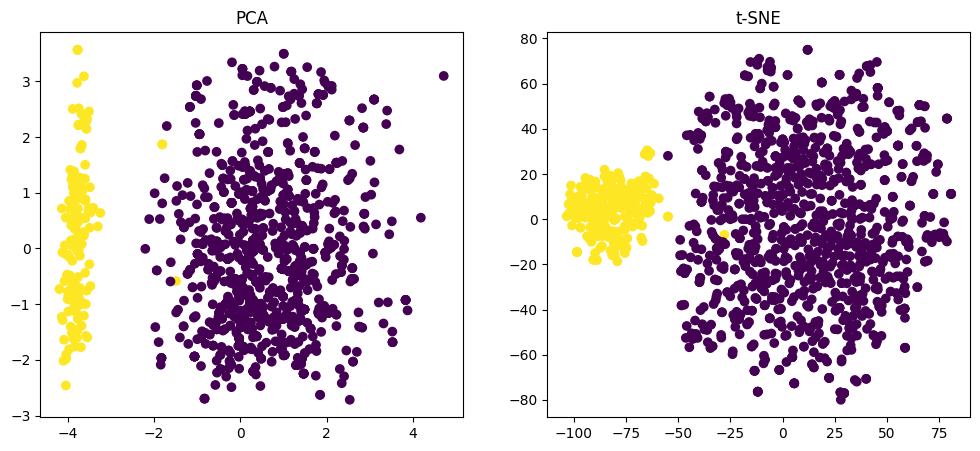

PCA: 0.5322912252365478
t-SNE: 0.3385755121707916


In [ ]:
n_clusters = 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_encoded)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_encoded)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X_train_encoded))
axes[0].set_title('PCA')
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X_train_encoded))
axes[1].set_title('t-SNE')
plt.show()
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels_pca = agg_clustering.fit_predict(X_pca)
agg_labels_tsne = agg_clustering.fit_predict(X_tsne)
silhouette_score_pca = silhouette_score(X_pca, agg_labels_pca)
silhouette_score_tsne = silhouette_score(X_tsne, agg_labels_tsne)
print(f"PCA: {silhouette_score_pca}")
print(f"t-SNE: {silhouette_score_tsne}")

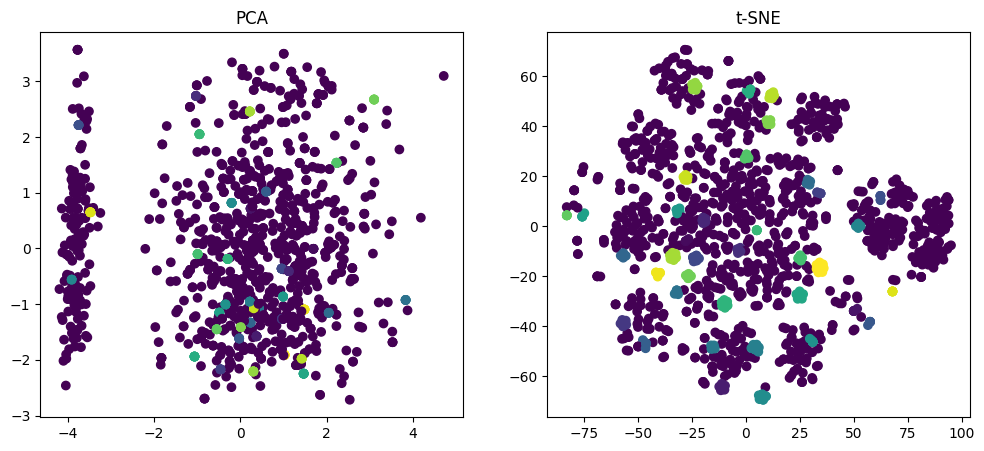

PCA: 0.3884807463502015
t-SNE: -0.4807453155517578


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
eps = 0.5
min_samples = 5
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_train_scaled))
axes[0].set_title('PCA')
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=DBSCAN(eps=eps, min_samples=min_samples).fit_predict(X_train_scaled))
axes[1].set_title('t-SNE')
plt.show()
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels_pca = dbscan.fit_predict(X_pca)
dbscan_labels_tsne = dbscan.fit_predict(X_tsne)
silhouette_score_pca = silhouette_score(X_pca, dbscan_labels_pca)
silhouette_score_tsne = silhouette_score(X_tsne, dbscan_labels_tsne)
print(f"PCA: {silhouette_score_pca}")
print(f"t-SNE: {silhouette_score_tsne}")